In [16]:
import matplotlib.pyplot as plt
import re
import math

# Benchmarks
benchmarks = ['bayes', 'genome', 'intruder', 'kmeans_high', 
              'kmeans_low', 'labyrinth', 'ssca2', 'vacation_high', 'vacation_low', 'yada']

# Read the raw data and tranfer to dictionary
def output2dic(filename):
    regex = re.compile(r'\d+')

    f = open(filename, "r")
    times = regex.search(f.readline())
    times = int(times.group(0))

    dic = {}

    lines = f.readlines()
    cur_bench = None
    for line in lines:
        sp = line.split(":", 1)

        if sp[0] == "Benchmarks":
            cur_bench = sp[1].replace(" ", "")
            cur_bench = cur_bench.replace("\n", "")

            dic[cur_bench] = []
            #print(dic[cur_bench])

        elif sp[0] == "Average":
            avg_sp = sp[1].split(",")
            for avg in avg_sp:
                avg = avg.replace(" ", "")
                avg = avg.replace("\n", "")
                #print(avg)
                if avg != '':
                    dic[cur_bench].append(avg)
    return dic

def cal_overhead(normal_dic, pcm_dic, benchmarks):       
    overhead = {}
    for bench in benchmarks:
        overhead[bench] = []
    for bench in benchmarks:
        if normal_dic[bench] == '' or pcm_dic[bench] == '':
            continue
        #TODO: overhead caculating method should be well considered
        overhead[bench] = [ (float(i) - float(j)) / float(j) for i, j in zip(pcm_dic[bench], normal_dic[bench])]
    return overhead

# Normalize exp_dic to [0-100] with baseline_dic is 100
def normalize_to_100(baseline_dic, exp_dic, benchmarks):
    normalized_exp_dic = {}
    for bench in benchmarks:
        normalized_exp_dic[bench] = []
    for bench in benchmarks:
        if baseline_dic[bench] == '' or exp_dic[bench] == '':
            continue
        normalized_exp_dic[bench] = [ (float(i) / float(j) * 100) for i, j in zip(exp_dic[bench], baseline_dic[bench])]
    return normalized_exp_dic



# Draw subplot with matplotlib
def drawPlot(row_n, col_n, plot_name, baseline_dic, experiment_dic):
    row_num = row_n
    col_num = col_n

    fig, ax = plt.subplots(row_num, col_num)
    fig.suptitle(plot_name, fontsize=25)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    
    # Calculate the graph input dic
    overhead = normalize_to_100(baseline_dic, experiment_dic, benchmarks)
    
    max_fig = len(overhead.items())
    thread_num = 2 * len(overhead[benchmarks[0]]) +1 
    power2 = (2**i for i in range(0, len(overhead[benchmarks[0]])))
    power2_list = []
    for ele in power2:
        power2_list.append(ele)
    count = 0
    for row in range(row_num):
        for col in range(col_num):
            if count > (max_fig - 1):
                continue
            else:
                bench_name = benchmarks[col_num*row + col]
                ax[row, col].set_title(bench_name)
                ax[row, col].bar(range(len(overhead[bench_name])), overhead[bench_name])
                plt.sca(ax[row, col])
                plt.axhline(y=100, color='gray', linestyle='-')
                plt.xticks(range(len(overhead[bench_name])), power2_list)
                count += 1
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.sca(ax[1,1])
    #plt.xticks(range(4), ['a', 'b', 'c', 'd'], color='red')
    #plt.xticks(range(len(overhead[bench_name])), range(2, thread_num, 2), color='red')
    fig.text(0.5, 0.05, 'STAMP Benchmarks with Different Thread Number', ha='center', va='center', fontsize=15)
    fig.text(0.08, 0.5, 'Execution time(%)', ha='center', va='center', rotation='vertical', fontsize=15)

In [17]:
baseline_dic = output2dic("raw_data/etl_backoff_baseline.txt")
test_dic = output2dic("raw_data/spin_nws_backoff_conflicttracking_epoch_100.txt")

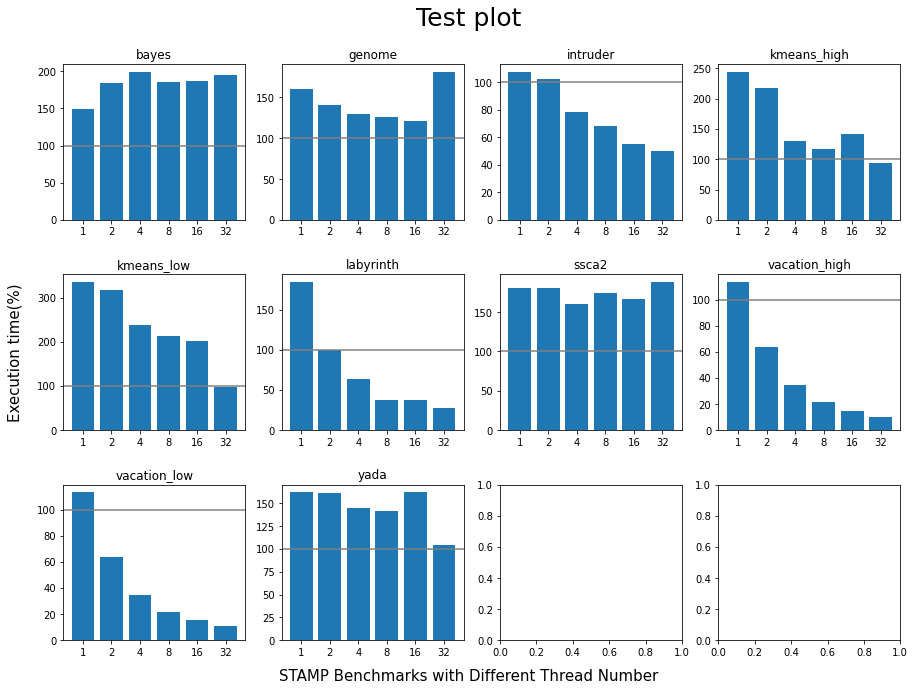

In [18]:
drawPlot(3, 4, "Test plot", baseline_dic, test_dic)